<a href="https://colab.research.google.com/github/bugcaps/workjob/blob/main/%EC%8B%A4%EA%B1%B0%EB%9E%98%EA%B0%80%EB%B6%84%EC%84%9D_%EC%84%9C%EC%9A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 서울 실거래가 조회
* 참조데이터 : 국도교통부 실거래가 자료공개 데이터 cvs 1년단위 download
  * http://rtdown.molit.go.kr/

In [1]:
# 드라이브  연결
from google.colab import drive
drive.mount('/content/drvie') 

Mounted at /content/drvie


In [2]:
!ls /content/drvie/MyDrive/apartHome/실거래가

'아파트(매매)__실거래가_2019_서울.csv'
'아파트(매매)__실거래가_2019_경기도.csv'
'아파트(매매)__실거래가_2020_서울.csv'
'아파트(매매)__실거래가_2020_경기도.csv'
'아파트(매매)__실거래가_2021_서울.csv'
'아파트(매매)__실거래가_2021_경기도.csv'


In [67]:
import pandas as pd

df = pd.read_csv('/content/drvie/MyDrive/apartHome/실거래가/아파트(매매)__실거래가_2021_서울.csv',encoding='CP949')
display(df)
display(df.columns)

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,202104,15,"174,000",9,1988.0,언주로 103,NaN,-,-
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202105,15,"195,000",5,1987.0,언주로 3,NaN,-,-
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202108,11,"200,000",3,1987.0,언주로 3,NaN,-,-
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,"220,000",2,1987.0,언주로 3,NaN,-,-
4,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,74.66,202101,17,"245,000",7,2020.0,개포로 264,NaN,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42632,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),57.66,202102,27,"30,500",5,2003.0,동일로144길 74,NaN,-,-
42633,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202111,4,"50,000",2,2003.0,동일로144길 74,NaN,중개거래,"서울 송파구, 서울 중랑구"
42634,서울특별시 중랑구 중화동,274-75,274.0,75.0,한영(102),72.22,202105,4,"49,500",4,2003.0,동일로144길 74,NaN,-,-
42635,서울특별시 중랑구 중화동,274-76,274.0,76.0,한영(103),58.46,202107,1,"30,000",2,2003.0,동일로144길 74,NaN,-,-


Index(['시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)',
       '층', '건축년도', '도로명', '해제사유발생일', '거래유형', '중개사소재지'],
      dtype='object')

## 실거래가 데이터 확인

In [4]:
df =df.filter(items=['시군구','번지','도로명', '단지명','전용면적(㎡)','계약년월','계약일','거래금액(만원)'])

In [5]:
#df[df.시군구 == '서울특별시 강남구 개포동']
## 성동구 추출
성동구df = df[df.시군구.str.contains('성동구')].copy()

성동구df

,시군구,번지,도로명,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원)
27948,서울특별시 성동구 금호동1가,1500,독서당로 343,금호삼성래미안,84.45,202101,16,"123,000"
27949,서울특별시 성동구 금호동1가,1500,독서당로 343,금호삼성래미안,84.45,202101,30,"125,000"
27950,서울특별시 성동구 금호동1가,1500,독서당로 343,금호삼성래미안,114.67,202104,3,"157,500"
27951,서울특별시 성동구 금호동1가,1500,독서당로 343,금호삼성래미안,59.95,202106,16,"117,000"
27952,서울특별시 성동구 금호동1가,1500,독서당로 343,금호삼성래미안,84.45,202106,26,"134,000"
...,...,...,...,...,...,...,...,...
29432,서울특별시 성동구 행당동,346,행당로 82,행당한진타운,59.96,202111,18,"109,000"
29433,서울특별시 성동구 행당동,346,행당로 82,행당한진타운,114.62,202111,21,"145,000"
29434,서울특별시 성동구 행당동,346,행당로 82,행당한진타운,114.62,202111,24,"160,000"
29435,서울특별시 성동구 행당동,346,행당로 82,행당한진타운,59.96,202112,4,"115,500"


## 데이터 전처리
* 전용면적을 면적그룹으로 그룹화한다.

In [66]:
def  면적그룹( val):
  ### ''' 10단위로 환산 '''
  return int(int(val) /10) *10

# 성동구df['면적그룹'].apply(면적그룹,성동구df['전용면적(㎡)'])
# 성동구df['면적그룹']=pd.to_numeric(성동구df['전용면적(㎡)']/10).astype(int)*10  ## float를 정수로 변환하여 *10  84.56 -> 80으로 변환
## 범주형 정리

# 전용면적을 불럭화 한다. 10단위로 자름
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 200, 10)]
성동구df["group"] = pd.cut(성동구df['전용면적(㎡)'], range(0, 205, 10), right=False, labels=labels)
성동구df["주소"]=성동구df["시군구"].str.strip()  + 성동구df["도로명"]	

단지목록 = set(성동구df['단지명'])
단지목록

{'E-아름다운세상',
 'LIG건영',
 'YM프라젠',
 '강변금호타운',
 '강변임광',
 '강변현대',
 '갤러리아포레',
 '건영',
 '극동',
 '극동그린',
 '극동미라주',
 '극동옥정',
 '금호',
 '금호1차푸르지오',
 '금호베스트빌',
 '금호삼성래미안',
 '금호어울림',
 '금호자이1차',
 '금호자이2차',
 '금호타운2',
 '금호한신',
 '금호현대',
 '대림(1차)',
 '대림(2차)',
 '대림e-편한세상',
 '대림강변타운',
 '대성유니드',
 '대우',
 '대우1',
 '대우2',
 '덕현해밀',
 '동아',
 '동아그린',
 '동인샤인빌',
 '두산',
 '두산위브',
 '뚝섬현대',
 '래미안 옥수 리버젠',
 '래미안하이리버',
 '레미테지',
 '로얄빌리지',
 '롯데',
 '롯데캐슬파크',
 '마장동중앙하이츠',
 '모닝빌',
 '무학현대',
 '벽산',
 '벽산빌라트',
 '브라운스톤2차',
 '브라운스톤금호',
 '블루빌',
 '삼산금호',
 '삼성',
 '삼성쉐르빌',
 '삼성홈타운',
 '삼익',
 '상기',
 '상리제나우스',
 '서울숲 한신 더 휴',
 '서울숲금강아미움',
 '서울숲대림',
 '서울숲더샵',
 '서울숲리버그린동아아파트',
 '서울숲리버뷰자이',
 '서울숲삼부아파트',
 '서울숲아이파크',
 '서울숲푸르지오',
 '서울숲푸르지오2차',
 '서울숲한양현대',
 '서울숲행당푸르지오',
 '세림',
 '센트라스',
 '센트럴큐브',
 '신금호두산위브',
 '신금호파크자이',
 '신동아',
 '신명스카이뷰',
 '신성미소지움',
 '쌍용',
 '아크로서울포레스트',
 '양지쉐르빌아파트',
 '옥수',
 '옥수어울림',
 '옥수파크힐스101동~116동',
 '옥수파크힐스117동~125동',
 '옥수하이츠',
 '왕십리KCC스위첸',
 '왕십리자이',
 '왕십리지웰',
 '왕십리지음재',
 '왕십리풍림아이원',
 '우방',
 '우방2',
 '우성',
 '우성2차',
 '이수브라운스톤',
 '

In [38]:
성동구df

,시군구,번지,도로명,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),group,주소
27948,서울특별시 성동구 금호동1가,1500,독서당로 343,금호삼성래미안,84.45,202101,16,"123,000",80 - 89,서울특별시 성동구 금호동1가독서당로 343
27949,서울특별시 성동구 금호동1가,1500,독서당로 343,금호삼성래미안,84.45,202101,30,"125,000",80 - 89,서울특별시 성동구 금호동1가독서당로 343
27950,서울특별시 성동구 금호동1가,1500,독서당로 343,금호삼성래미안,114.67,202104,3,"157,500",110 - 119,서울특별시 성동구 금호동1가독서당로 343
27951,서울특별시 성동구 금호동1가,1500,독서당로 343,금호삼성래미안,59.95,202106,16,"117,000",50 - 59,서울특별시 성동구 금호동1가독서당로 343
27952,서울특별시 성동구 금호동1가,1500,독서당로 343,금호삼성래미안,84.45,202106,26,"134,000",80 - 89,서울특별시 성동구 금호동1가독서당로 343
...,...,...,...,...,...,...,...,...,...,...
29432,서울특별시 성동구 행당동,346,행당로 82,행당한진타운,59.96,202111,18,"109,000",50 - 59,서울특별시 성동구 행당동행당로 82
29433,서울특별시 성동구 행당동,346,행당로 82,행당한진타운,114.62,202111,21,"145,000",110 - 119,서울특별시 성동구 행당동행당로 82
29434,서울특별시 성동구 행당동,346,행당로 82,행당한진타운,114.62,202111,24,"160,000",110 - 119,서울특별시 성동구 행당동행당로 82
29435,서울특별시 성동구 행당동,346,행당로 82,행당한진타운,59.96,202112,4,"115,500",50 - 59,서울특별시 성동구 행당동행당로 82


In [68]:
#면적별량 = 성동구df['거래금액(만원)'].groupby(성동구df['group'],성동구df['단지명']).std
#면적별량.describe()


TypeError: ignored

## 2021 성동구 아파트별 평형별 거래가 많은 top 50

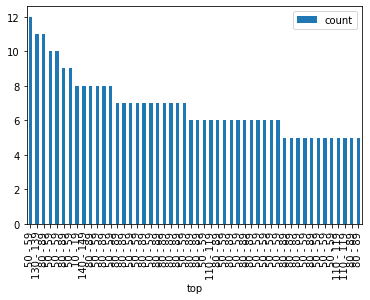

In [69]:
## 평형별 
whereprice_group = 성동구df['group'].groupby([성동구df['시군구'],성동구df['단지명'],성동구df['계약년월']])
##whereprice_group = 성동구df['group'].groupby([성동구df['계약년월']])
whereprice_group.describe()
## 거래가 활방한 지역으로 정렬한다.
whereprice_group = whereprice_group.describe().sort_values('count', ascending=False).head(50)


whereprice_group.style
# whereprice_group['count','top'].plot()
whereprice_group.plot.bar(x="top", y="count");
